In [ ]:
# !pip install --upgrade imbalanced-learn
# !pip install --upgrade scikit-learn
# !pip install --upgrade scikit-learn imbalanced-learn

In [1]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

#uplift model
from causalml.metrics import plot_gain
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from causalml.inference.meta import BaseTClassifier
from causalml.inference.meta import BaseSClassifier
from causalml.inference.meta import BaseXClassifier
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.dataset import make_uplift_classification

# Dataframe & variable

In [3]:
# #pandas print all columns
# pd.set_option('display.max_columns', None)
# #pandas print all rows
pd.set_option('display.max_rows', 10)

In [24]:
#read csv data from dataset file
df = pd.read_csv('dataset/65d4f0fcb8af9_amex_campus_challenge_train_3.csv')

In [25]:
#same col order as the definition csv 
col_list = ['customer', 'merchant', 'ind_recommended', 'activation', 'customer_profile_01', 'customer_profile_02', 'customer_profile_03', 'customer_profile_04', 'customer_spend_01', 'customer_spend_02', 'customer_spend_03', 'customer_spend_04', 'customer_spend_05', 'customer_spend_06', 'customer_spend_07', 'customer_industry_spend_01', 'customer_industry_spend_02', 'customer_industry_spend_03', 'customer_industry_spend_04', 'customer_industry_spend_05', 'customer_spend_13', 'customer_spend_14', 'customer_spend_15', 'customer_spend_16', 'customer_spend_17', 'customer_spend_18', 'customer_spend_19', 'customer_merchant_01', 'customer_merchant_02', 'customer_digital_activity_01', 'customer_digital_activity_02', 'distance_01', 'distance_02', 'distance_03', 'distance_04', 'distance_05', 'merchant_profile_01', 'merchant_profile_02', 'merchant_profile_03', 'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_03', 'merchant_spend_04', 'merchant_spend_05', 'merchant_spend_06', 'merchant_spend_07', 'merchant_spend_08', 'merchant_spend_09', 'merchant_spend_10', 'merchant_spend_11', 'customer_digital_activity_03', 'customer_digital_activity_04', 'customer_digital_activity_05', 'customer_digital_activity_06', 'customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_09', 'customer_digital_activity_10', 'customer_digital_activity_11', 'customer_digital_activity_12', 'customer_digital_activity_13', 'customer_digital_activity_14', 'customer_digital_activity_15', 'customer_digital_activity_16', 'customer_digital_activity_17', 'customer_digital_activity_18', 'customer_digital_activity_19', 'customer_digital_activity_20', 'customer_digital_activity_21', 'customer_digital_activity_22', 'customer_merchant_03']
df = df[col_list]

In [26]:
df.fillna(0, inplace=True)

In [5]:
df.shape

(12229978, 71)

In [8]:
df.head()

ind_recommended  activation  customer_digital_activity_04  \
0                0           0                           NaN   
1                0           0                           NaN   
2                0           0                           NaN   
3                0           0                           NaN   
4                1           0                           NaN   

   customer_spend_01  customer_industry_spend_01  customer_industry_spend_02  \
0         107.215862                   26.686594                        74.0   
1          35.552000                   50.928261                         3.0   
2          31.623103                   48.837872                        19.0   
3         112.277391                         NaN                         NaN   
4         448.427273                         NaN                         NaN   

   customer_industry_spend_03  customer_industry_spend_04  \
0                     3682.75                       138.0   
1                     1171.35                        23.0   
2                     2295.38                        47.0   
3                         NaN                         NaN   
4                         NaN                         NaN   

   customer_industry_spend_05  customer_spend_02  customer_spend_03  \
0                       111.0               14.0              133.0   
1                        17.0                2.0                8.0   
2                        42.0               11.0               62.0   
3                         NaN               16.0               33.0   
4                         NaN                5.0                8.0   

   customer_merchant_02  customer_merchant_01  customer_spend_04  \
0                   NaN                   NaN             4477.0   
1                   NaN                   NaN            17577.0   
2                   NaN                   NaN            49494.0   
3                   NaN                   NaN                NaN   
4                   NaN                   NaN                NaN   

   customer_spend_05  customer_spend_06  customer_spend_07  merchant_spend_01  \
0           29719.09              782.0              306.0          29.781042   
1            1051.40               52.0               43.0          34.643313   
2            4695.22              196.0              136.0        1731.000000   
3            5190.94              167.0              112.0          54.800000   
4           11713.96               33.0               28.0         166.000000   

   merchant_spend_02  merchant_spend_03  merchant_spend_04  merchant_spend_05  \
0               43.0                0.0                0.0                0.0   
1               97.0                0.0                0.0                0.0   
2                2.0             1731.0                2.0                2.0   
3                4.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   merchant_spend_06  merchant_spend_07  merchant_spend_08  \
0               32.0            1429.49               48.0   
1               15.0            5646.86              163.0   
2                8.0            3462.00                2.0   
3               62.0             274.00                5.0   
4               74.0             166.00                1.0   

   merchant_profile_01  customer_merchant_03  customer_profile_01  \
0                101.0              0.905510              5466.06   
1                403.0              0.961583               781.56   
2                406.0              0.327672              1457.84   
3                326.0              0.769936               351.22   
4                326.0                   NaN               831.67   

   customer_profile_02  customer_digital_activity_05  customer_spend_13  \
0              1700.00                           NaN                3.0   
1               597.41

In [47]:
df.describe().transpose()

count           mean            std  \
customer                      12229978.0  228105.121432  134222.960909   
merchant                      12229978.0  295298.457984  171441.435935   
ind_recommended               12229978.0       0.126498       0.332410   
activation                    12229978.0       0.005725       0.075447   
customer_profile_01           12228283.0    2667.741290   17745.235668   
customer_profile_02           12228283.0    2415.794442   16498.530609   
customer_profile_03           12149224.0      47.735580      35.746591   
customer_profile_04           12225867.0     178.546300     139.212661   
customer_spend_01             10182213.0     134.226734     645.473812   
customer_spend_02             10182213.0       7.641269       6.627998   
customer_spend_03             11287277.0      45.296485      49.615593   
customer_spend_04              4200275.0  107021.303817  257608.963077   
customer_spend_05             11287277.0   15027.782342   77166.703435   
customer_spend_06             11619078.0     234.316772     357.231911   
customer_spend_07             11619078.0     112.783500      97.381272   
customer_industry_spend_01     6375794.0     116.329031     581.135226   
customer_industry_spend_02     6375794.0      12.486146      21.233724   
customer_industry_spend_03     6375794.0    2160.901083   24843.254651   
customer_industry_spend_04     6375794.0      30.912555      71.148945   
customer_industry_spend_05     6375794.0      23.552949      39.830723   
customer_spend_13              5792753.0       8.105447       6.990881   
customer_spend_14              2858764.0      16.979839      15.068438   
customer_spend_15              3580364.0       6.861473       6.102857   
customer_spend_16              5792753.0       6.701928       7.198721   
customer_spend_17              3580364.0       7.924568       5.973595   
customer_spend_18              5653767.0       1.863472      26.838457   
customer_spend_19              5819802.0      76.468595     531.960418   
customer_merchant_01             10806.0     155.547499     799.392930   
customer_merchant_02             10806.0       1.746900       2.291339   
customer_digital_activity_01  11641262.0       0.530574       0.351778   
customer_digital_activity_02  12197100.0       6.404841      14.802698   
distance_01                    4147701.0      11.352941      96.126539   
distance_02                    4638720.0       1.948002       4.609510   
distance_03                    4638720.0     139.002695     535.781576   
distance_04                   10025978.0      30.822421     170.552378   
distance_05                   12229978.0       6.190254       8.368794   
merchant_profile_01           11561538.0     261.437731     137.907190   
merchant_profile_02           10325700.0       0.256606       0.159184   
merchant_profile_03           10709319.0   21650.767893   25399.574044   
merchant_spend_01              9697394.0     273.599147    1253.565070   
merchant_spend_02              9697394.0      63.193397     218.795077   
merchant_spend_03              9697394.0     140.488387    1098.714629   
merchant_spend_04              9697394.0       6.701795      85.642758   
merchant_spend_05              9697394.0       9.193186     148.148094   
merchant_spend_06             11560901.0     -89.661474     342.438461   
merchant_spend_07              9697394.0    7400.115961   35644.463564   
merchant_spend_08              9697394.0      85.560921     369.720011   
merchant_spend_09             10709319.0   22532.198311   26291.744725   
merchant_spend_10             11828068.0     214.808541    1115.603642   
merchant_spend_11              1044523.0       5.448223       6.133360   
customer_digital_activity_03   5445161.0       0.389108       1.000751   
customer_digital_activity_04   1472619.0       9.745803      41.568390   
customer_digital_activity_05   3979751.0       1.059873       0.239805   
customer_digital_activity_06   3979751.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229978 entries, 0 to 12229977
Data columns (total 71 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   ind_recommended               int64  
 1   activation                    int64  
 2   customer_digital_activity_04  float64
 3   customer_spend_01             float64
 4   customer_industry_spend_01    float64
 5   customer_industry_spend_02    float64
 6   customer_industry_spend_03    float64
 7   customer_industry_spend_04    float64
 8   customer_industry_spend_05    float64
 9   customer_spend_02             float64
 10  customer_spend_03             float64
 11  customer_merchant_02          float64
 12  customer_merchant_01          float64
 13  customer_spend_04             float64
 14  customer_spend_05             float64
 15  customer_spend_06             float64
 16  customer_spend_07             float64
 17  merchant_spend_01             float64
 18  merchant_spend_02   

In [54]:
# missing value checking 
missing_values = df.isnull().any()

# Print the result
print("Missing Values in Each Column:")
print(missing_values) 

Missing Values in Each Column:
customer                        False
merchant                        False
ind_recommended                 False
activation                      False
customer_profile_01              True
customer_profile_02              True
customer_profile_03              True
customer_profile_04              True
customer_spend_01                True
customer_spend_02                True
customer_spend_03                True
customer_spend_04                True
customer_spend_05                True
customer_spend_06                True
customer_spend_07                True
customer_industry_spend_01       True
customer_industry_spend_02       True
customer_industry_spend_03       True
customer_industry_spend_04       True
customer_industry_spend_05       True
customer_spend_13                True
customer_spend_14                True
customer_spend_15                True
customer_spend_16                True
customer_spend_17                True
customer_spend_18  

In [56]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Print the result
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
customer                         0.00
merchant                         0.00
ind_recommended                  0.00
activation                       0.00
customer_profile_01              0.01
customer_profile_02              0.01
customer_profile_03              0.66
customer_profile_04              0.03
customer_spend_01               16.74
customer_spend_02               16.74
customer_spend_03                7.71
customer_spend_04               65.66
customer_spend_05                7.71
customer_spend_06                5.00
customer_spend_07                5.00
customer_industry_spend_01      47.87
customer_industry_spend_02      47.87
customer_industry_spend_03      47.87
customer_industry_spend_04      47.87
customer_industry_spend_05      47.87
customer_spend_13               52.63
customer_spend_14               76.62
customer_spend_15               70.72
customer_spend_16               52.63
customer_spend_17               70.72
custo

In [7]:
# unique customer
# unique merchant 
# unique customer, merchant pair 
print('num of unique merchant: ', df.merchant.drop_duplicates().count(),
      'num of unique customer: ', df.customer.drop_duplicates().count(),
      'num of unique pairs: ', df[['customer', 'merchant']].drop_duplicates().count())
#merchant : customer = 12229978 / 462584 = 26 

num of unique merchant:  591973 num of unique customer:  462584 num of unique pairs:  customer    12229978
merchant    12229978
dtype: int64


In [41]:
# data example 
df[df['customer'] == 168972].sort_values('merchant') 

customer  merchant  ind_recommended  activation  \
2324004     168972     69841                0           0   
4858293     168972     79697                0           0   
5765880     168972     96708                0           0   
251738      168972    130913                0           0   
2146476     168972    135941                0           0   
0           168972    152285                0           0   
4113706     168972    206659                0           0   
6391973     168972    247444                0           0   
9554806     168972    253979                0           0   
12216419    168972    254805                0           1   
5690828     168972    263966                0           0   
4233046     168972    289371                0           0   
2682661     168972    299959                0           0   
1063017     168972    307019                0           0   
3129164     168972    309887                0           0   
5792420     168972    313845                0           0   
3556590     168972    363453                1           0   
10789251    168972    374550                0           0   
5866308     168972    431887                0           0   
3966408     168972    530463                0           0   

          customer_profile_01  customer_profile_02  customer_profile_03  \
2324004               5466.06               1700.0            58.434969   
4858293               5466.06               1700.0            58.434969   
5765880               5466.06               1700.0            58.434969   
251738                5466.06               1700.0            58.434969   
2146476               5466.06               1700.0            58.434969   
0                     5466.06               1700.0            58.434969   
4113706               5466.06               1700.0            58.434969   
6391973               5466.06               1700.0            58.434969   
9554806               5466.06               1700.0            58.434969   
12216419              5466.06               1700.0            58.434969   
5690828               5466.06               1700.0            58.434969   
4233046               5466.06               1700.0            58.434969   
2682661               5466.06               1700.0            58.434969   
1063017               5466.06               1700.0            58.434969   
3129164               5466.06               1700.0            58.434969   
5792420               5466.06               1700.0            58.434969   
3556590               5466.06               1700.0            58.434969   
10789251              5466.06               1700.0            58.434969   
5866308               5466.06               1700.0            58.434969   
3966408               5466.06               1700.0            58.434969   

          customer_profile_04  customer_spend_01  customer_spend_02  \
2324004                  86.0         107.215862               14.0   
4858293                  86.0         107.215862               14.0   
5765880                  86.0         107.215862               14.0   
251738                   86.0         107.215862               14.0   
2146476                  86.0         107.215862               14.0   
0                        86.0         107.215862               14.0   
4113706                  86.0         107.215862               14.0   
6391973                  86.0         107.215862               14.0   
9554806                  86.0         107.215862               14.0   
12216419                 86.0         107.215862               14.0   
5690828                  86.0         107.215862               14.0   
4233046                  86.0         107.215862               14.0   
2682661                  86.0         107.215862               14.0   
1063017                  86.0         107.215862               14.0   
3129164                  86.0         107.215862               14.0   
5792420         

In [43]:
# data example 
df[df['customer'] == 128976].sort_values('merchant') 

customer  merchant  ind_recommended  activation  \
9152909     128976      6217                0           0   
5754751     128976      9869                0           0   
10250985    128976     51418                0           0   
10654608    128976     56010                0           0   
4045234     128976     58337                0           0   
7214453     128976     85075                0           0   
5277310     128976     87929                0           0   
4382620     128976     89254                0           0   
9189584     128976     96860                0           0   
2703083     128976    110035                0           0   
519319      128976    125142                0           0   
5299764     128976    156219                0           0   
8756542     128976    203595                0           0   
10770344    128976    242588                0           0   
4101042     128976    269303                0           0   
6414671     128976    273081                0           0   
1114373     128976    289656                0           0   
9280855     128976    297945                0           0   
5429254     128976    426767                0           0   
3740027     128976    430026                0           0   
9426291     128976    523927                0           0   
5167795     128976    586374                0           0   

          customer_profile_01  customer_profile_02  customer_profile_03  \
9152909                354.28               430.75            76.864847   
5754751                354.28               430.75            76.864847   
10250985               354.28               430.75            76.864847   
10654608               354.28               430.75            76.864847   
4045234                354.28               430.75            76.864847   
7214453                354.28               430.75            76.864847   
5277310                354.28               430.75            76.864847   
4382620                354.28               430.75            76.864847   
9189584                354.28               430.75            76.864847   
2703083                354.28               430.75            76.864847   
519319                 354.28               430.75            76.864847   
5299764                354.28               430.75            76.864847   
8756542                354.28               430.75            76.864847   
10770344               354.28               430.75            76.864847   
4101042                354.28               430.75            76.864847   
6414671                354.28               430.75            76.864847   
1114373                354.28               430.75            76.864847   
9280855                354.28               430.75            76.864847   
5429254                354.28               430.75            76.864847   
3740027                354.28               430.75            76.864847   
9426291                354.28               430.75            76.864847   
5167795                354.28               430.75            76.864847   

          customer_profile_04  customer_spend_01  customer_spend_02  \
9152909                 227.0          33.222857               11.0   
5754751                 227.0          33.222857               11.0   
10250985                227.0          33.222857               11.0   
10654608                227.0          33.222857               11.0   
4045234                 227.0          33.222857               11.0   
7214453                 227.0          33.222857               11.0   
5277310                 227.0          33.222857               11.0   
4382620                 227.0          33.222857               11.0   
9189584                 227.0          33.222857               11.0   
2703083                 227.0          33.222857               11.0   
519319                  227.0          33.222857               11.0   
5299764                 227.

In [21]:
df[df['merchant'] == 254805][col_list]

customer  merchant  ind_recommended  activation  \
1810656     446308    254805                0           0   
2314159     115852    254805                1           0   
2699855     169437    254805                0           0   
2950316     397635    254805                0           0   
3176192      68770    254805                0           0   
6013989     341973    254805                1           0   
6759172     113815    254805                0           0   
7199173     381934    254805                1           0   
7328222       2093    254805                0           0   
7692132      55458    254805                0           0   
8226666     346440    254805                0           0   
8862078     238829    254805                0           0   
9224008     183617    254805                0           0   
9762873     123046    254805                0           0   
10883387     41887    254805                0           0   
11028687    204483    254805                0           0   
11580522    246874    254805                0           0   
12182071     52473    254805                0           1   
12216419    168972    254805                0           1   

          customer_profile_01  customer_profile_02  customer_profile_03  \
1810656                 58.19              6843.88            26.108734   
2314159               3310.32              1639.54            99.891067   
2699855               5708.75             10065.00            71.126625   
2950316                  0.00                 0.00            70.746294   
3176192              39711.51             20173.77            90.529316   
6013989               7332.22              6340.00            44.966702   
6759172                194.43               500.00            59.439698   
7199173               3596.43              2868.77            82.542411   
7328222               2547.09              1966.86           100.000000   
7692132               1181.64               711.86            92.034687   
8226666                  0.00                 0.00            82.800093   
8862078                 12.40                40.00             7.544063   
9224008               2999.16              2999.16            90.551241   
9762873                980.25              1120.99            18.438730   
10883387               138.40               138.40           100.000000   
11028687              6093.35              6384.59            74.352763   
11580522                17.99                41.87             2.118780   
12182071              5330.96              8500.00            90.043153   
12216419              5466.06              1700.00            58.434969   

          customer_profile_04  customer_spend_01  customer_spend_02  \
1810656                  18.0           3.240000                1.0   
2314159                 258.0          81.479333               19.0   
2699855                  33.0          65.759333               11.0   
2950316                 127.0         215.821250                5.0   
3176192                 143.0         132.110299               26.0   
6013989                  13.0        2310.550000                2.0   
6759172                 267.0          74.671667                6.0   
7199173                 388.0         116.985094               12.0   
7328222                 379.0          66.799655               17.0   
7692132                 625.0          58.635000               15.0   
8226666                  55.0          81.269773                8.0   
8862078                  83.0          14.060000                1.0   
9224008                 182.0         113.835714                4.0   
9762873                 252.0         121.279231                2.0   
10883387                487.0         136.735000                2.0   
11028687                175.0         105.434194               17.0   
11580522                156.0                NaN                NaN   
12182071  

In [13]:
# ATE 
activated_recommended = df[(df['ind_recommended'] == 1) & (df['activation'] == 1)].customer.count()          
activated_non_recommended = df[(df['ind_recommended'] == 0) & (df['activation'] == 1)].customer.count()
recommended = df[df['ind_recommended'] == 1].customer.count()
non_recommended = df[df['ind_recommended'] == 0].customer.count()
# non_activated_recommended = df[(df['ind_recommended'] == 1) & (df['ind_active'] == 0)].count()
# non_activated_non_recommended = df[(df['ind_recommended'] == 1) & (df['ind_active'] == 0)].count()

ate_recommended = activated_recommended / recommended 
ate_non_recommended = activated_non_recommended / non_recommended 
#print all num 
print('activated_recommended: ', activated_recommended,
      'activated_non_recommended: ', activated_non_recommended,
      'recommended', recommended, 
      'non recommended', non_recommended, 
      'ate_recommended: ', ate_recommended,
      'ate_non_recommended: ', ate_non_recommended) 

# recommendation percentage: 1547069  / (1547069  + 10682909) = 12%

activated_recommended:  9843 activated_non_recommended:  60173 recommended 1547069 non recommended 10682909 ate_recommended:  0.6362353586039149 ate_non_recommended:  0.5632641820687605


# data cleaning

In [6]:
# sampling 10% of data, ensure that "activation" = 1 label are in proportion 
df_sample = train_test_split(df, test_size=0.1, random_state=42, stratify=df['activation'])[1]
df_sample.shape

(1222998, 71)

In [7]:
# Calculate percentage of missing values in each column
missing_percentage = (df_sample.isnull().mean() * 100).round(2)

# Print the result
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
customer                         0.00
merchant                         0.00
ind_recommended                  0.00
activation                       0.00
customer_profile_01              0.01
customer_profile_02              0.01
customer_profile_03              0.64
customer_profile_04              0.03
customer_spend_01               16.76
customer_spend_02               16.76
customer_spend_03                7.70
customer_spend_04               65.59
customer_spend_05                7.70
customer_spend_06                4.97
customer_spend_07                4.97
customer_industry_spend_01      47.79
customer_industry_spend_02      47.79
customer_industry_spend_03      47.79
customer_industry_spend_04      47.79
customer_industry_spend_05      47.79
customer_spend_13               52.58
customer_spend_14               76.56
customer_spend_15               70.73
customer_spend_16               52.58
customer_spend_17               70.73
custo

In [8]:
#missing value 
# Calculate percentage of missing values in each column
missing_percentage = (df_sample.isnull().mean() * 100).round(2)

# Print the result
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
customer                         0.00
merchant                         0.00
ind_recommended                  0.00
activation                       0.00
customer_profile_01              0.01
customer_profile_02              0.01
customer_profile_03              0.64
customer_profile_04              0.03
customer_spend_01               16.76
customer_spend_02               16.76
customer_spend_03                7.70
customer_spend_04               65.59
customer_spend_05                7.70
customer_spend_06                4.97
customer_spend_07                4.97
customer_industry_spend_01      47.79
customer_industry_spend_02      47.79
customer_industry_spend_03      47.79
customer_industry_spend_04      47.79
customer_industry_spend_05      47.79
customer_spend_13               52.58
customer_spend_14               76.56
customer_spend_15               70.73
customer_spend_16               52.58
customer_spend_17               70.73
custo

In [9]:
# fill na 
df_sample.fillna(0, inplace=True)

In [10]:
# outlier 
# Display the summary table
summary_table = df_sample.describe(percentiles=[0.05, 0.95]).transpose()
summary_table = summary_table[['min', '5%', '50%', '95%', 'max']]
summary_table.columns = ['Min', '0.05', 'Median', '0.95', 'Max']

print(summary_table)

                                       Min          0.05         Median  \
customer                          1.000000  22235.850000  226604.000000   
merchant                          0.000000  28795.000000  295254.000000   
ind_recommended                   0.000000      0.000000       0.000000   
activation                        0.000000      0.000000       0.000000   
customer_profile_01            -999.000000      0.000000     635.740000   
customer_profile_02          -28724.060000      0.000000     506.835000   
customer_profile_03               0.000000      0.000000      44.279142   
customer_profile_04               0.000000     18.000000     152.000000   
customer_spend_01                 0.000000      0.000000      53.151965   
customer_spend_02                 0.000000      0.000000       4.000000   
customer_spend_03                 0.000000      0.000000      23.000000   
customer_spend_04                 0.000000      0.000000       0.000000   
customer_spend_05        

In [11]:
# Winsorizing numerical variables at two tails by 5% each.
col_to_exclude = ['customer', 'merchant', 'ind_recommended', 'activation',
                 # small value feature
                'customer_digital_activity_07', 'customer_digital_activity_08', 'customer_digital_activity_18',
                'customer_digital_activity_09', 'customer_merchant_02', 
                # important feature
                'customer_merchant_03']

numerical_columns = [col for col in df_sample.columns if col not in col_to_exclude]
# print(numerical_columns)
for col in numerical_columns:
    df_sample[col] = winsorize(np.array(df_sample[col]), limits=[0.05, 0.05])  # 5% at both ends

In [12]:
#normalizing 
normalized_data = pd.DataFrame()
for col in df_sample.columns:
    if col not in col_to_exclude:
        normalized_data[col] = (df_sample[col] - df_sample[col].mean()) / df_sample[col].std()
    else: 
        normalized_data[col] = df_sample[col]
normalized_data.describe()

customer      merchant  ind_recommended    activation  \
count  1.222998e+06  1.222998e+06     1.222998e+06  1.222998e+06   
mean   2.282732e+05  2.953320e+05     1.264401e-01  5.725275e-03   
std    1.342544e+05  1.715775e+05     3.323448e-01  7.544866e-02   
min    1.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%    1.108640e+05  1.460090e+05     0.000000e+00  0.000000e+00   
50%    2.266040e+05  2.952540e+05     0.000000e+00  0.000000e+00   
75%    3.448680e+05  4.438610e+05     0.000000e+00  0.000000e+00   
max    4.625830e+05  5.919710e+05     1.000000e+00  1.000000e+00   

       customer_profile_01  customer_profile_02  customer_profile_03  \
count         1.222998e+06         1.222998e+06         1.222998e+06   
mean         -7.599080e-13        -4.297465e-13         2.184895e-14   
std           1.000000e+00         1.000000e+00         1.000000e+00   
min          -7.041882e-01        -6.846270e-01        -1.323037e+00   
25%          -6.653091e-01        -6.454249e-01        -9.863087e-01   
50%          -4.440095e-01        -4.561426e-01        -8.711098e-02   
75%           2.037362e-01         1.791910e-01         9.901778e-01   
max           2.987359e+00         3.023673e+00         1.468178e+00   

       customer_profile_04  customer_spend_01  customer_spend_02  \
count         1.222998e+06       1.222998e+06       1.222998e+06   
mean         -3.921883e-16      -9.063719e-13       3.166618e-15   
std           1.000000e+00       1.000000e+00       1.000000e+00   
min          -1.212490e+00      -9.087017e-01      -1.033985e+00   
25%          -8.580024e-01      -6.688484e-01      -8.646409e-01   
50%          -1.798512e-01      -2.953764e-01      -3.566093e-01   
75%           6.138938e-01       2.370196e-01       6.594539e-01   
max           2.178265e+00       2.993819e+00       2.352893e+00   

       customer_spend_03  customer_spend_04  customer_spend_05  \
count       1.222998e+06       1.222998e+06       1.222998e+06   
mean        1.103377e-15      -2.756119e-14       6.675730e-13   
std         1.000000e+00       1.000000e+00       1.000000e+00   
min        -9.297636e-01      -4.431306e-01      -8.040511e-01   
25%        -8.126357e-01      -4.431306e-01      -7.264830e-01   
50%        -3.909755e-01      -4.431306e-01      -4.204587e-01   
75%         5.226218e-01      -2.200542e-01       3.382542e-01   
max         2.443519e+00       3.372066e+00       2.822444e+00   

       customer_spend_06  customer_spend_07  customer_industry_spend_01  \
count       1.222998e+06       1.222998e+06                1.222998e+06   
mean        1.163024e-15       6.251973e-17               -1.741484e-14   
std         1.000000e+00       1.000000e+00                1.000000e+00   
min        -8.901717e-01      -1.100105e+00               -6.575535e-01   
25%        -7.776698e-01      -8.903993e-01               -6.575535e-01   
50%        -4.142020e-01      -3.032241e-01               -4.916950e-01   
75%         4.771594e-01       7.662735e-01                2.492206e-01   
max         2.528156e+00       2.014021e+00                3.017904e+00   

       customer_industry_spend_02  customer_industry_spend_03  \
count                1.222998e+06                1.222998e+06   
mean                 2.722151e-15                1.049087e-13   
std                  1.000000e+00                1.000000e+00   
min                 -5.273445e-01               -5.107621e-01   
25%                 -5.273445e-01               -5.107621e-01   
50%                 -4.216926e-01               -4.984540e-01   
75%                  9.151909e-04               -6.875750e-02   
max                  3.276125e+00                3.221246e+00   

       customer_industry_spend_04  customer_industry_spend_05  \
count                1.222998e+06                1.222998e+06   
mean                 3.730631e-16               -2.123778e-16   
std                  1.000000e+00                1.000000e+00   
min                

# feature relationship

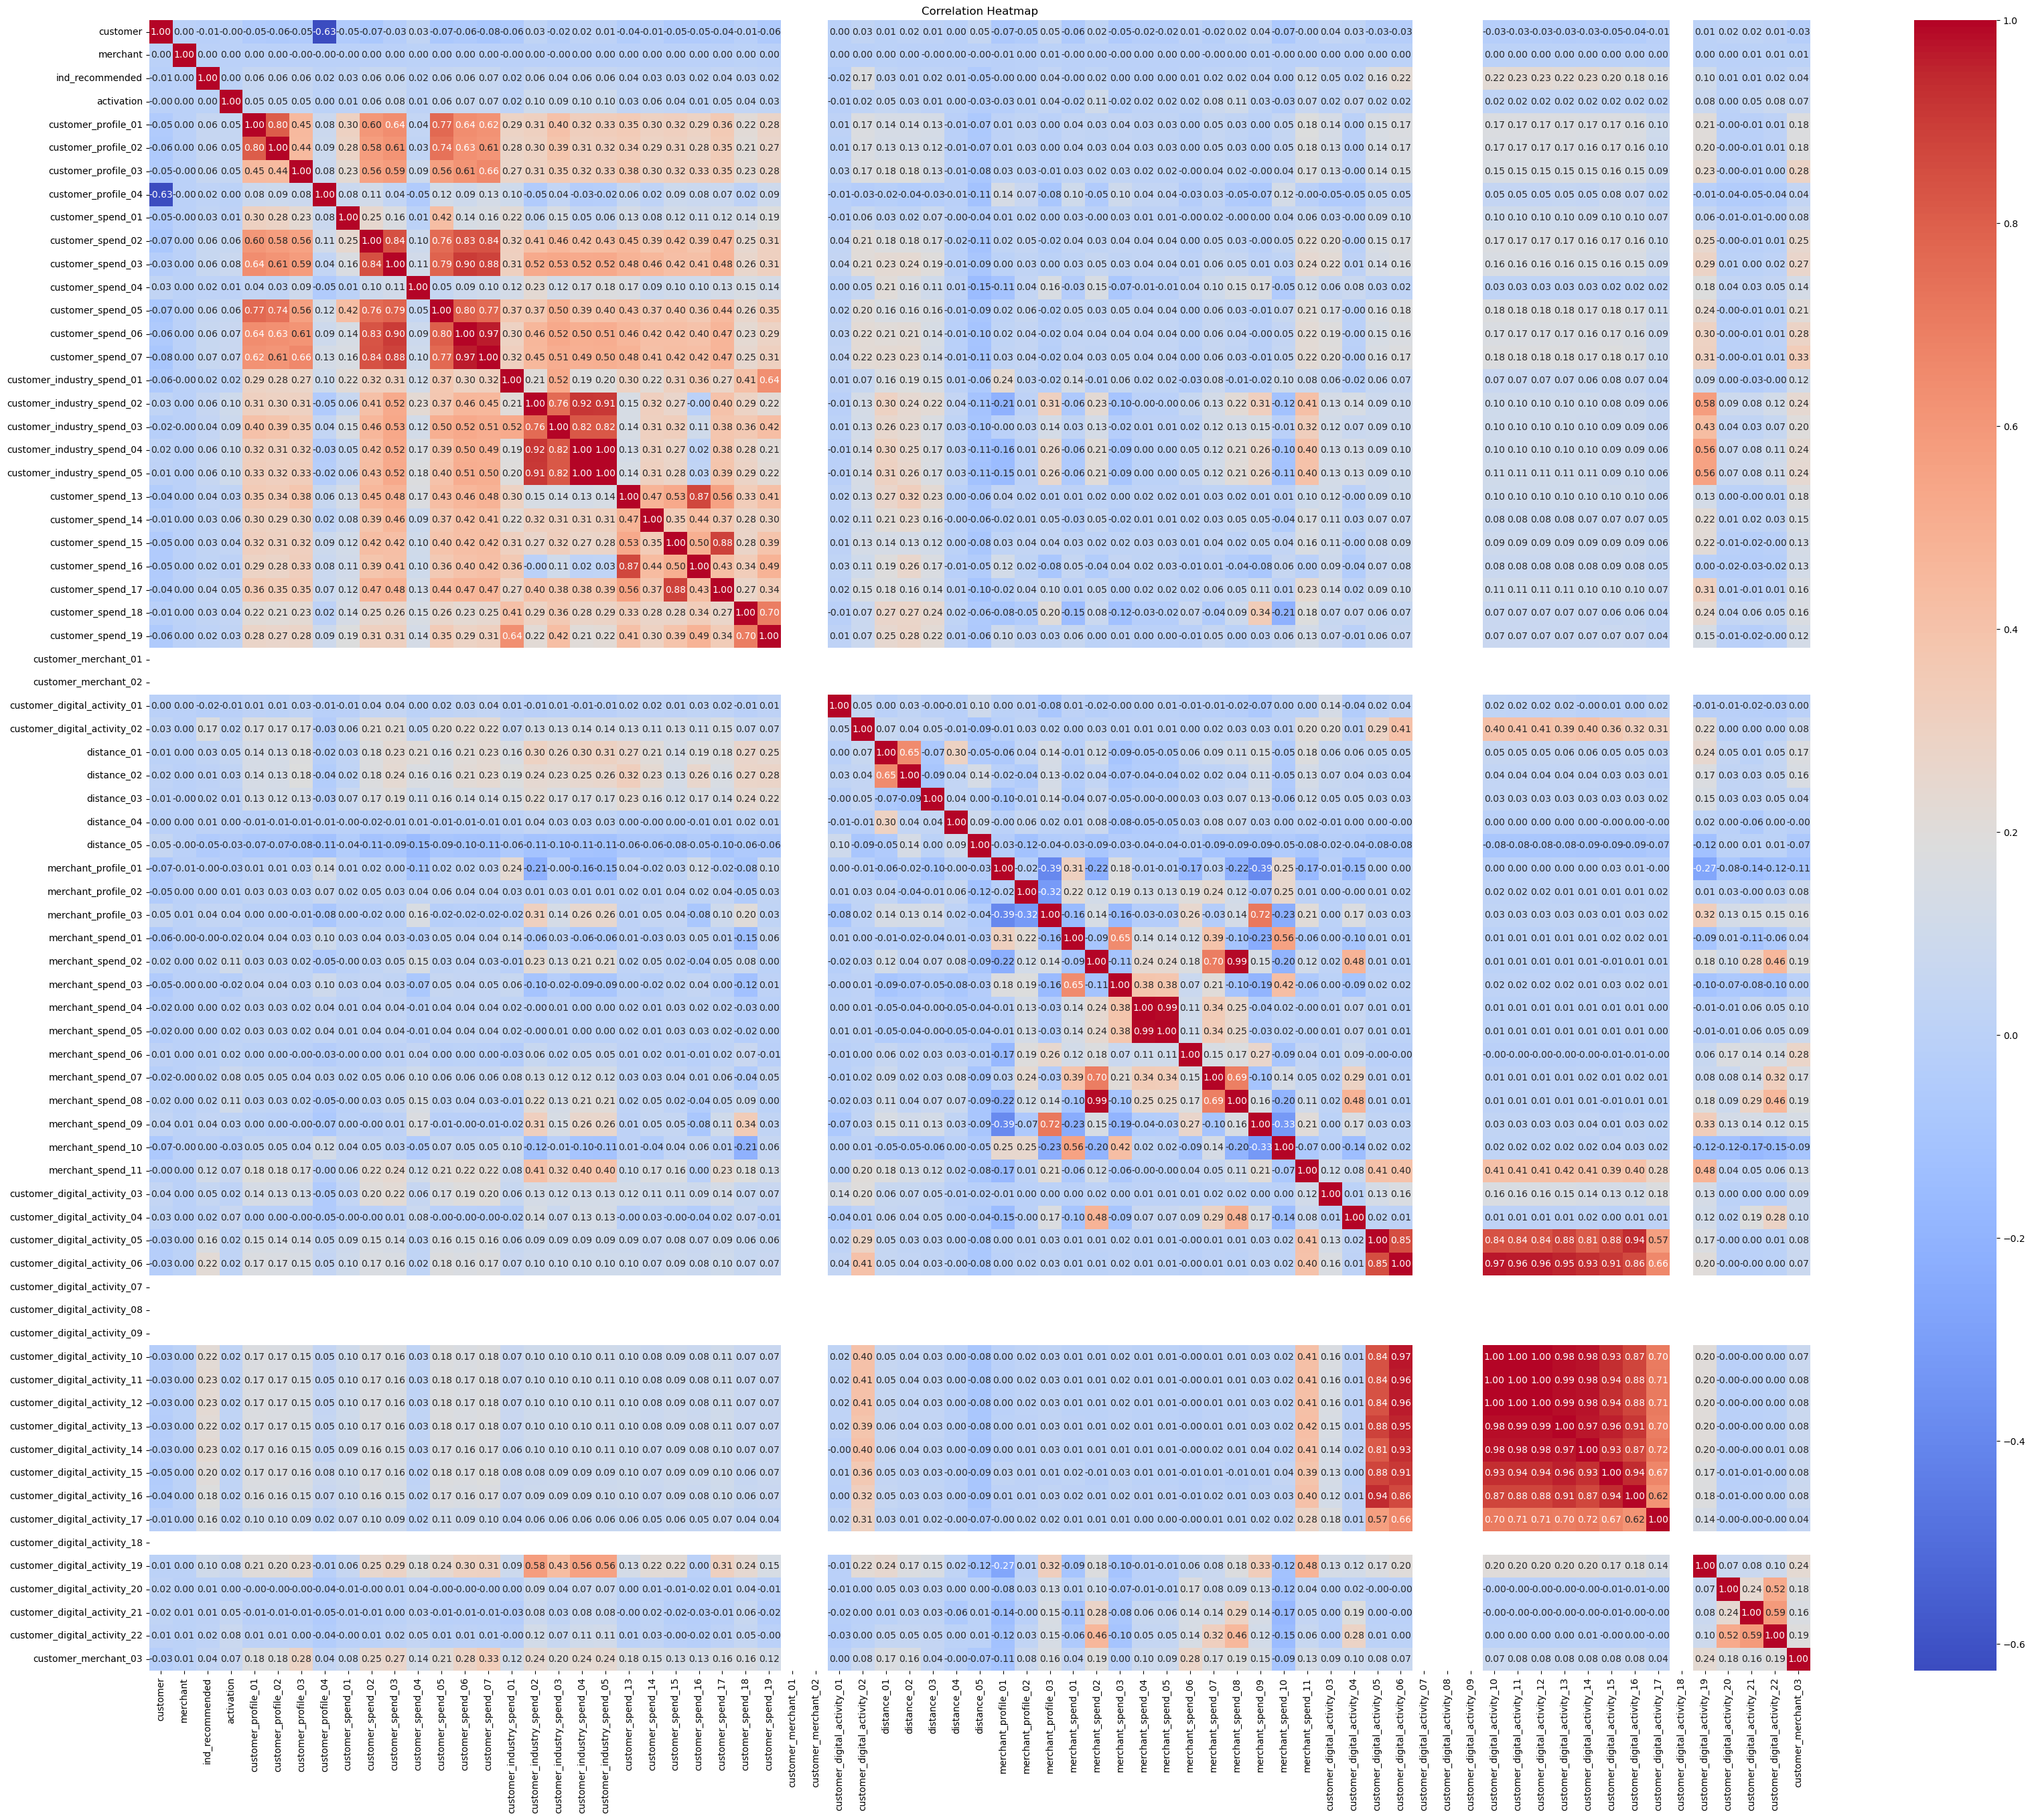

In [93]:
# Calculate correlation matrix
corr = normalized_data[col_list].corr()

# Plot and save heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
# Export the correlation matrix as an Excel file
corr.to_excel('correlation_matrix.xlsx', index=True)
plt.show()
# correlation plot: https://docs.google.com/spreadsheets/d/1ElPtYfvGaScjRG3TbcFzMN2hWUSuC7_hBhocsc0qhBE/edit#gid=1736017854 

high corr: 
Among customer spending, customer profile, customer industry spend 
Among customer digital activity 
-> PCA 

customer digital activity 19 and industry spending 1, 2,3, 4, 5 
-> customer digital activity 19 : industry spending history 

merchant_spend_11 and customer industry spending 2 - 5


customer digital activity 2 corr 10 - 17 

customer_merchant_03	Customer Merchant Similarity: correlated with many metrics: 
customer profile 1- 3 
customer spend 2, 3, 6, 7 
customer industry spend 2 - 5
merchant_spend 2, 6
customer digital activity 19 

activation: merchant_spend_08 & 02 11%
-> merchant with more customer & spending -> activation ? 

activation: customer_spend_02 - 05  10%
-> customer spend more amount / freq / merchant -> higher chance of activation? (or activation -> more spend?)

recommandation: 
customer_digital_activity_02, 05, 06, 10 -17 :~17%

In [13]:
data = normalized_data.copy()

count    462584.000000
mean         26.438394
std          11.524850
min           1.000000
25%          21.000000
50%          26.000000
75%          31.000000
max         135.000000
Name: merchant, dtype: float64

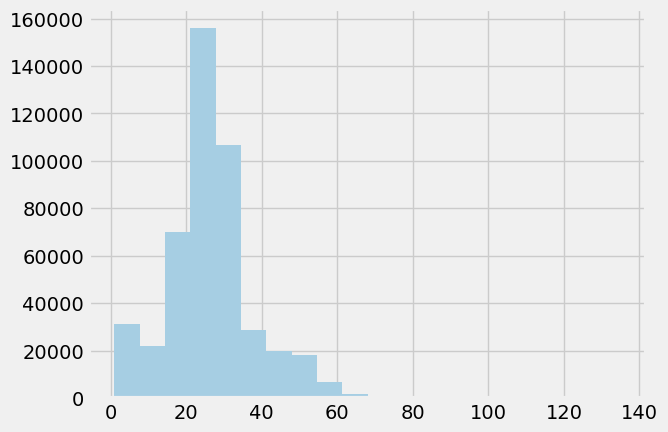

In [32]:
#user journey: 
# login website -> expose with x number of merchant (x% promoted, x% non-promoted) -> click? -> x% activation, x% non activated 

#num of distinct merchant each customer expose, plot hist by sns
df.groupby('customer')['merchant'].nunique().hist(bins=20)
df.groupby('customer')['merchant'].nunique().describe()

count    462584.000000
mean          0.134325
std           0.171861
min           0.000000
25%           0.037037
50%           0.080000
75%           0.166667
max           1.000000
Name: ind_recommended, dtype: float64

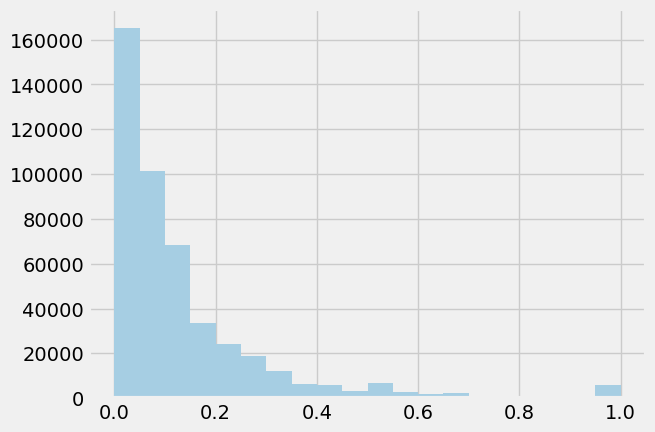

In [33]:
# probability of seeing recommanded merchant 
df.groupby('customer')['ind_recommended'].mean().hist(bins=20)
df.groupby('customer')['ind_recommended'].mean().describe()

# median: 8% 

In [13]:
# ATE 
activated_recommended = df[(df['ind_recommended'] == 1) & (df['activation'] == 1)].customer.count()          
activated_non_recommended = df[(df['ind_recommended'] == 0) & (df['activation'] == 1)].customer.count()
recommended = df[df['ind_recommended'] == 1].customer.count()
non_recommended = df[df['ind_recommended'] == 0].customer.count()
# non_activated_recommended = df[(df['ind_recommended'] == 1) & (df['ind_active'] == 0)].count()
# non_activated_non_recommended = df[(df['ind_recommended'] == 1) & (df['ind_active'] == 0)].count()

conversion_rate_treatment = activated_recommended / recommended 
conversion_rate_control = activated_non_recommended / non_recommended 
#print all num 
print('activated_recommended: ', activated_recommended,
      'activated_non_recommended: ', activated_non_recommended,
      'recommended', recommended, 
      'non recommended', non_recommended, 
      'conversion_rate_treatment: ', conversion_rate_treatment,
      'conversion_rate_control: ', conversion_rate_control
       'ATE', conversion_rate_treatment - conversion_rate_control) 

# recommendation percentage: 1547069  / (1547069  + 10682909) = 12%

activated_recommended:  9843 activated_non_recommended:  60173 recommended 1547069 non recommended 10682909 ate_recommended:  0.6362353586039149 ate_non_recommended:  0.5632641820687605


# understand more about the dataset 

In [45]:
# num of record per user (i.e. num of merchant they face)  
df.groupby('customer')['merchant'].count().describe()

count    462584.000000
mean         26.438394
std          11.524850
min           1.000000
25%          21.000000
50%          26.000000
75%          31.000000
max         135.000000
Name: merchant, dtype: float64

In [46]:
# is that all user has same num of recommandation ? 
# num of recommandation per user 
display(df.groupby('customer')['ind_recommended'].sum().describe()) 

#proportion of recommanded merchant over total encounter merchant 
(df.groupby('customer')['ind_recommended'].sum() / df.groupby('customer')['merchant'].count()).describe() 

count    462584.000000
mean          3.344407
std           4.348621
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          69.000000
Name: ind_recommended, dtype: float64

count    462584.000000
mean          0.134325
std           0.171861
min           0.000000
25%           0.037037
50%           0.080000
75%           0.166667
max           1.000000
dtype: float64

assumption: the number of record is proportion to the number of time a user login the website 

In [75]:
# plot relationship between encounter merchant and recommandation on user level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df.groupby('customer')['merchant'].count(), y=df.groupby('customer')['ind_recommended'].sum())
# plt.xlabel('Number of merchants encountered')
# plt.ylabel('Number of recommendations received')
# plt.title('Relationship between merchant encounters and recommendations')
# plt.show()

In [ ]:
# find user sample with > 10 recommanded. 
# these people are rare, are they login the website many time?  
df.groupby('customer')['ind_recommended'].sum().head()

In [ ]:
# find people where 
df['

# create a customer dimension dataset 

In [33]:
import pandas as pd

# Assuming df is your original DataFrame

# Specify the columns to be dropped
columns_to_drop = [col for col in df.columns if col.startswith("merchant") or 
                                              col.startswith("customer_industry_spend") or 
                                              col.startswith("distance") or 
                                              col.startswith("customer_merchant_") or  
                                              (col.startswith("customer_spend_") and int(col.split("_")[-1]) in [4] + list(range(13, 20)))]

# Group by 'customer' and perform aggregations
aggregations = {
    'ind_recommended': 'sum',
    'activation': 'sum'}

# Add mean aggregation for all other columns
for col in df.columns:
    if col not in aggregations and col not in columns_to_drop:
        aggregations[col] = 'mean'

# Perform aggregation directly without creating an intermediate DataFrame
customer_df = df.drop(columns=columns_to_drop).groupby('customer', as_index = False).agg(aggregations)

# Create a separate Series for the count of rows by 'merchant'
num_rows_by_merchant = df.groupby('customer')['merchant'].count().reset_index()
customer_df = pd.merge(customer_df, num_rows_by_merchant, on='customer', how='left').rename(columns={'merchant': 'num_of_visited_merchant'})

# Add the count of unique values in 'customer_profile_01' as 'website_visit_session_cnt'
website_visit_session_cnt = df.groupby('customer')['customer_profile_01'].nunique().reset_index()
customer_df = pd.merge(customer_df, website_visit_session_cnt, on='customer', how='left').rename(columns={'customer_profile_01': 'website_visit_session_cnt'})

# Add a binary column indicating whether 'activation' is greater than or equal to 1
customer_df['has_activation'] = (customer_df['activation'] >= 1).astype(int)

# Sum of 'activation' when 'ind_recommended' = 1, grouped by customer
num_activate_treat = df[df['ind_recommended'] == 1].groupby('customer')['activation'].sum().reset_index().rename(columns={'activation': 'num_activate_treat'})

# Sum of 'activation' when 'ind_recommended' = 0, grouped by customer
num_activate_control = df[df['ind_recommended'] == 0].groupby('customer')['activation'].sum().reset_index().rename(columns={'activation': 'num_activate_control'})

# Merge the count of activations for treatment and control groups
customer_df = pd.merge(customer_df, num_activate_treat, on='customer', how='left')
customer_df = pd.merge(customer_df, num_activate_control, on='customer', how='left')

# Calculate probabilities and uplift
customer_df['prob_activate_treat'] = customer_df['num_activate_treat'] / customer_df['ind_recommended']
customer_df['prob_activate_control'] = customer_df['num_activate_control'] / (customer_df['num_of_visited_merchant'] - customer_df['ind_recommended'])
customer_df['uplift'] = customer_df['prob_activate_treat'] - customer_df['prob_activate_control']

# Fill NaN values with 0 in case there are no activations for treatment or control
customer_df.fillna(0, inplace=True)

# Print or use customer_df as needed
customer_df.head()


ind_recommended  activation  customer  customer_profile_01_x  \
0                1           2       0.0              1837.9200   
1                5           0       1.0                94.6156   
2                4           0       2.0              2007.3400   
3                2           0       3.0               591.7300   
4                2           0       4.0               313.4100   

   customer_profile_02  customer_profile_03  customer_profile_04  \
0            1728.7700            99.714867                448.0   
1              98.6076            27.542687                340.0   
2            3040.4900            74.040338                345.0   
3             549.5200            99.425764                394.0   
4               0.0000           100.000000                510.0   

   customer_spend_01  customer_spend_02  customer_spend_03  customer_spend_05  \
0         102.508261               18.0               92.0         42868.3900   
1          63.847200                1.0                9.0           807.4052   
2          41.345227                7.0               38.0         12822.5100   
3          36.121429                8.0               66.0          6274.2100   
4          62.456000                3.0               30.0          5775.9400   

   customer_spend_06  customer_spend_07  customer_digital_activity_01  \
0             909.00             318.00                      1.000000   
1              21.28              20.28                      0.358974   
2             644.00             260.00                      1.000000   
3             259.00             148.00                      1.000000   
4              47.00              26.00                      0.755102   

   customer_digital_activity_02  customer_digital_activity_03  \
0                      4.833333                           0.0   
1                      6.500000                           0.0   
2                      2.500000                           0.0   
3                      1.500000                           0.0   
4                      3.666667                           0.0   

   customer_digital_activity_04  customer_digital_activity_05  \
0                      3.600000                           0.0   
1                      0.720000                           1.0   
2                      0.464286                           0.0   
3                      0.733333                           0.0   
4                      1.000000                           1.0   

   customer_digital_activity_06  customer_digital_activity_07  \
0                           0.0                           0.0   
1                           1.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   customer_digital_activity_08  customer_digital_activity_09  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   customer_digital_activity_10  customer_digital_activity_11  \
0                           0.0                           0.0   
1                           5.0                           5.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           9.0                           9.0   

   customer_digital_activity_12  customer_digital_activity_13  \
0                           0.0                           0.0   
1                           5.0                           5.0   
2                           0.0                           0.0   
3                           0.0                   

in here there are user that has visit the website > 1 times. the way that I calculate uplift doees not seperate calculate for each visit.  

In [34]:
customer_df.to_csv(r"C:\Users\e1127447\Documents\AE uplift\dataset/customer_dim.csv")

In [8]:
# customer_df = pd.read_csv(r"C:\Users\e1127447\Documents\AE uplift\dataset/customer_dim.csv")

In [59]:
# customer_df.to_csv(r"C:\Users\e1127447\Documents\AE uplift\America-Express-Hackthon/raw_data/customer_dim.csv")

In [43]:
# customer uplift distribution 
print(customer_df[abs(customer_df['uplift']) > 0].shape)
customer_df[customer_df['uplift'] > 0].head(30)

(46785, 43)


ind_recommended  activation  customer  customer_profile_01_x  \
38                 10           1      38.0            2111.353659   
63                 22           1      63.0             951.678043   
64                 17           1      64.0            8596.606897   
89                 10           2      89.0            1919.054286   
97                 15           1      97.0            3636.495758   
...               ...         ...       ...                    ...   
1279                8           1    1279.0            1254.001923   
1349               13           2    1349.0            3179.051111   
1406                1           1    1406.0              65.500000   
1478               10           6    1478.0            2505.212740   
1525                5           1    1525.0            9574.729444   

      customer_profile_02  customer_profile_03  customer_profile_04  \
38            2238.971951            82.574958                408.0   
63             872.789565            70.879686                340.0   
64           10536.295172           100.000000                255.0   
89            1837.828571            99.946178                439.0   
97            3540.911818            82.256095                409.0   
...                   ...                  ...                  ...   
1279           892.552308           100.000000                379.0   
1349          4531.910000            96.353023                388.0   
1406            61.500000           100.000000                384.0   
1478          2911.693014            89.464382                375.0   
1525          8730.482222            99.965936                363.0   

      customer_spend_01  customer_spend_02  customer_spend_03  \
38            42.213353           6.512195          58.073171   
63            40.967570           8.630435          70.478261   
64           154.002401          12.862069          97.103448   
89            70.614840           7.600000          76.971429   
97            76.614408           7.515152          60.606061   
...                 ...                ...                ...   
1279          89.089846          13.576923          53.038462   
1349          52.453108           8.777778          90.037037   
1406         114.842941           3.000000          16.000000   
1478         172.008114          17.684932         176.136986   
1525         307.016261          31.972222         388.916667   

      customer_spend_05  customer_spend_06  customer_spend_07  \
38         10647.939024         557.219512         284.560976   
63          9254.040870         349.369565         209.804348   
64         66767.875172         846.586207         326.724138   
89         16684.527143         923.457143         303.542857   
97         11071.249394         307.363636         173.727273   
...                 ...                ...                ...   
1279       12389.520769         337.384615         189.461538   
1349       12523.297037         404.444444         237.740741   
1406        2097.450000          25.000000          17.000000   
1478       67790.530274         695.698630         268.493151   
1525      260982.910278        1857.666667         355.833333   

      customer_digital_activity_01  customer_digital_activity_02  \
38                        0.957447                      2.333333   
63                        0.760870                     24.500000   
64                        0.000000                     10.833333   
89                        0.156250                      1.333333   
97                        1.000000                     27.500000   
...                            ...                           ...   
1279                      0.000000                      3.333333   
1349                      0.619048                      5.000000   
1406                      1.000000                      0.666667   
1478                      1.000000                     14.166667   
15

In [52]:
# customer uplift distribution 
customer_df['uplift'].hist(bins=20)
customer_df['uplift'].describe()
print(customer_df[abs(customer_df['uplift']) > 0 ].shape[0] /  customer_df.shape[0])

0.10113838783874929


In [16]:
# customer session cnt 
customer_df['website_visit_session_cnt'].hist(bins=20)
customer_df['website_visit_session_cnt'].describe()

count    462584.000000
mean          1.603298
std           0.788003
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: website_visit_session_cnt, dtype: float64

In [64]:
# num_of_visited_merchant distribution 
customer_df['num_of_visited_merchant'].hist(bins=20)
customer_df['num_of_visited_merchant'].describe()

count    462584.000000
mean         26.438394
std          11.524850
min           1.000000
25%          21.000000
50%          26.000000
75%          31.000000
max         135.000000
Name: num_of_visited_merchant, dtype: float64

count    462584.000000
mean          3.344407
std           4.348621
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          69.000000
Name: ind_recommended, dtype: float64

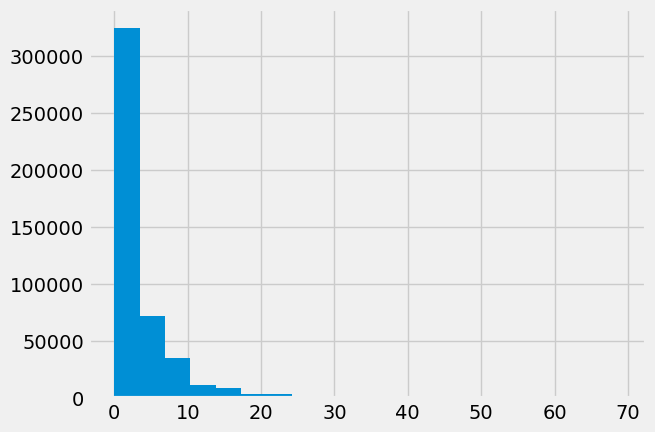

In [70]:
#  num of recommanded merchant 
customer_df['ind_recommended'].hist(bins=20)
customer_df['ind_recommended'].describe()

count    462584.000000
mean          0.134325
std           0.171861
min           0.000000
25%           0.037037
50%           0.080000
75%           0.166667
max           1.000000
Name: recommand_merchant_rate, dtype: float64

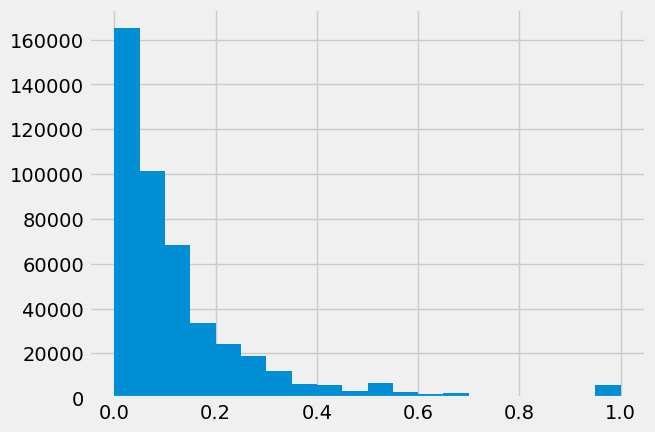

In [67]:
#  num of recommanded merchant over all visited merchant 
customer_df['recommand_merchant_rate'] = customer_df['ind_recommended']  / customer_df['num_of_visited_merchant'] 
customer_df['recommand_merchant_rate'].hist(bins=20)
customer_df['recommand_merchant_rate'].describe()

In [72]:
# further analyse customer with recommand_merchant_rate >= 0.5
customer_df[customer_df['recommand_merchant_rate'] >= 0.5].head()

ind_recommended  activation  customer  customer_profile_01  \
customer                                                               
23                     19           4      23.0          7933.990833   
42                     13           0      42.0           261.400870   
60                     23           2      60.0          2484.098857   
64                     17           1      64.0          8596.606897   
69                     10           0      69.0          2795.298000   

          customer_profile_02  customer_profile_03  customer_profile_04  \
customer                                                                  
23                6944.025278            74.006646                359.0   
42                 238.913043            30.256724                478.0   
60                2400.396000            33.157148                450.0   
64               10536.295172           100.000000                255.0   
69                3321.300000            99.400335                510.0   

          customer_spend_01  customer_spend_02  customer_spend_03  \
customer                                                            
23                80.049718          11.000000         153.000000   
42                19.034808           2.956522          13.565217   
60                71.249784          15.942857          80.057143   
64               154.002401          12.862069          97.103448   
69                92.660654           9.700000          88.400000   

          customer_spend_05  customer_spend_06  customer_spend_07  \
customer                                                            
23             24502.868056         692.916667         277.694444   
42              1114.750870         110.130435          96.913043   
60             16036.526857         294.000000         179.771429   
64             66767.875172         846.586207         326.724138   
69             18969.205000         264.100000         148.500000   

          customer_digital_activity_01  customer_digital_activity_02  \
customer                                                               
23                            0.423077                     16.166667   
42                            0.000000                     28.333333   
60                            0.372881                     29.666667   
64                            0.000000                     10.833333   
69                            0.352941                     14.833333   

          customer_digital_activity_03  customer_digital_activity_04  \
customer                                                               
23                                 0.0                      2.638889   
42                                 0.0                      0.217391   
60                                 0.0                      0.171429   
64                                 0.0                      0.275862   
69                                 0.0                      2.000000   

          customer_digital_activity_05  customer_digital_activity_06  \
customer                                                               
23                                 1.0                           2.0   
42                                 1.0                           3.0   
60                                 1.0                           2.0   
64                                 1.0                           1.0   
69                                 1.0                           4.0   

          customer_digital_activity_07  customer_digital_activity_08  \
customer                                                               
23                                 1.0                           1.0   
42                                 0.0                           0.0   
60                                 0.0                           0.0   
64                                 0.0                           0.0   
69                                 0.0                          

these customer's num_of_visited_merchant & num of recommendation is higher than mean.

In [69]:
# distribution of activated merchant 
customer_df['activation'].hist(bins=20)
print(customer_df['activation'].describe())
#show 80%, 85%, 90%, 95% percentile
customer_df['activation'].quantile([0.8, 0.85, 0.9, 0.95])

count    462584.000000
mean          0.151358
std           0.507030
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: activation, dtype: float64


0.80    0.0
0.85    0.0
0.90    1.0
0.95    1.0
Name: activation, dtype: float64

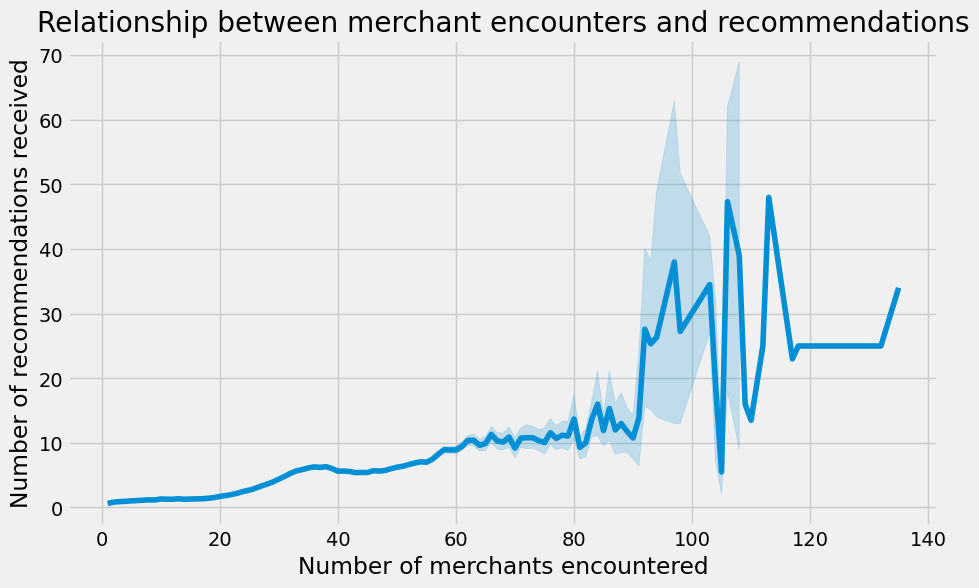

In [74]:
# relationship between merchant visited and recommendation on user level
plt.figure(figsize=(10, 6))
sns.lineplot(x=customer_df['num_of_visited_merchant'], y=customer_df['ind_recommended'])
plt.xlabel('Number of merchants encountered')
plt.ylabel('Number of recommendations received')
plt.title('Relationship between merchant encounters and recommendations')
plt.show()

## explore customer features distribution

In [60]:
customer_act_df = customer_df[customer_df['activation'] > 0]

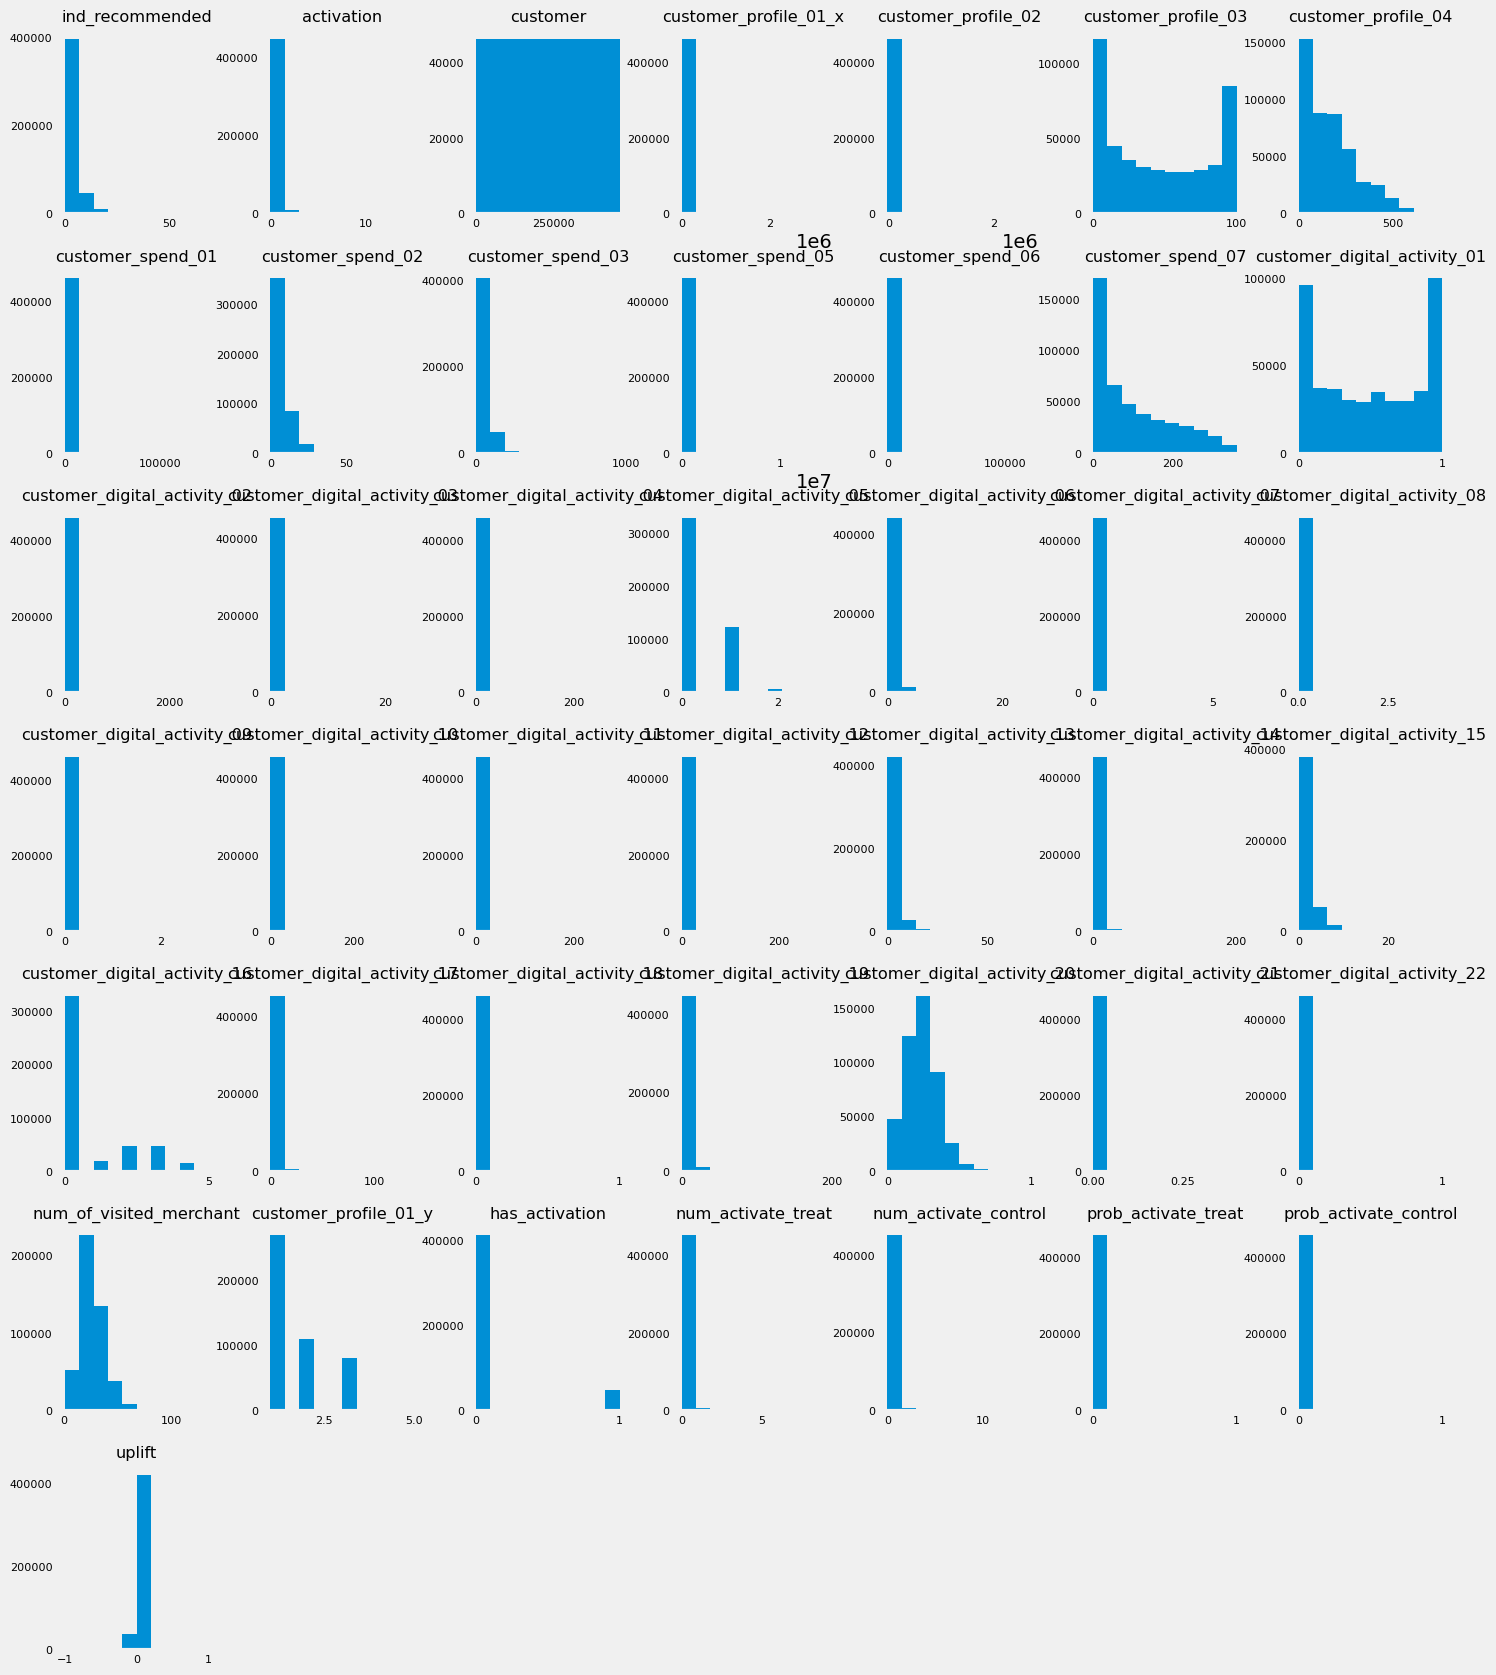

In [54]:
# Assuming customer_df is your DataFrame
customer_df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8, grid=False)

# Adjust title font size for each subplot
for ax in plt.gcf().get_axes():
    ax.set_title(ax.get_title(), fontsize='small')

plt.show()

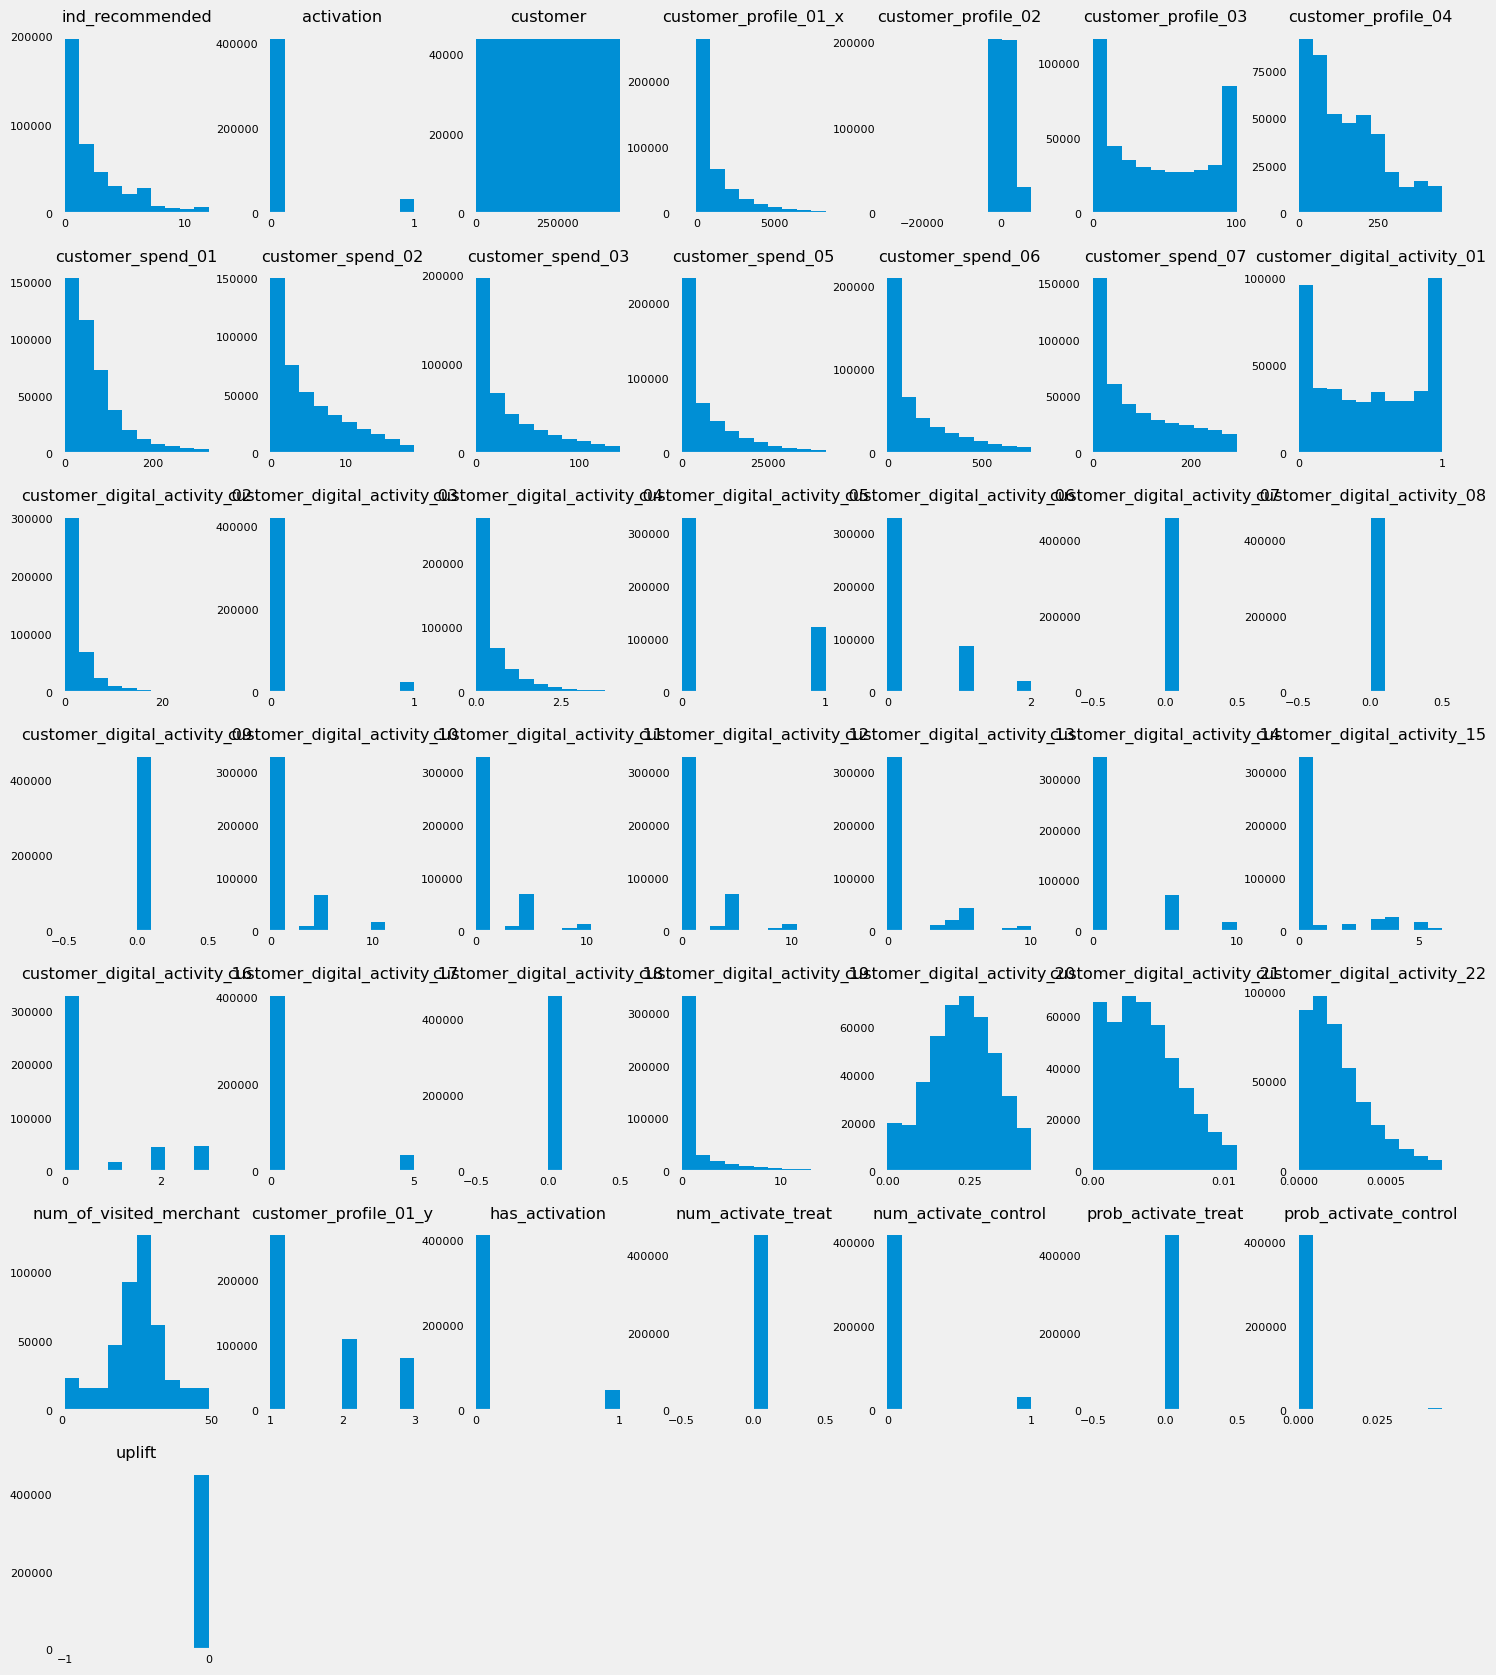

In [53]:
# filter out top 5 % data 
def filter_outliers(column):
    threshold = column.quantile(0.95)
    return column[column <= threshold]

# Apply the function to filter out outliers for each column
customer_df.apply(filter_outliers).hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8, grid=False)

# Adjust title font size for each subplot
for ax in plt.gcf().get_axes():
    ax.set_title(ax.get_title(), fontsize='small')

plt.show()

In [48]:
# corr
corr_matrix = customer_df.corr()
features_rel = corr_matrix['uplift']
cor_features = features_rel[abs(features_rel) > 0.1].sort_values(ascending=False)
print(cor_features)

uplift                   1.000000
prob_activate_treat      0.812678
num_activate_treat       0.465234
has_activation          -0.124654
activation              -0.145186
num_activate_control    -0.330437
prob_activate_control   -0.444861
Name: uplift, dtype: float64


In [49]:
# no correlated variable 

In [85]:
# corr
corr_matrix = customer_df.corr()
features_rel = corr_matrix['activation']
cor_features = features_rel[abs(features_rel) > 0.1].sort_values(ascending=False)
print(cor_features)

activation                      1.000000
customer_spend_03               0.333434
customer_spend_07               0.301624
customer_spend_02               0.264579
customer_spend_06               0.236315
customer_digital_activity_19    0.214583
ind_recommended                 0.204498
customer_profile_03             0.201352
num_of_visited_merchant         0.166654
customer_digital_activity_07    0.154840
customer_digital_activity_16    0.133627
customer_digital_activity_13    0.130033
customer_digital_activity_15    0.125209
customer_digital_activity_14    0.122096
customer_digital_activity_06    0.121456
customer_digital_activity_05    0.120641
customer_digital_activity_11    0.114978
customer_digital_activity_12    0.114474
customer_digital_activity_10    0.107756
customer_digital_activity_08    0.106597
recommand_merchant_rate         0.104610
Name: activation, dtype: float64


note: here the activation is the sum number of activation merchant of a user. 
customer_spend_07	Days with Spend 
customer_spend_06	Customer transactions

In [89]:
# corr
corr_matrix = customer_df.corr()
features_rel = corr_matrix['has_activation']
cor_features = features_rel[abs(features_rel) > 0.1].sort_values(ascending=False)
print(cor_features)

has_activation                  1.000000
activation                      0.858551
customer_spend_03               0.338137
customer_spend_07               0.318554
customer_spend_02               0.279071
customer_spend_06               0.239088
customer_profile_03             0.218151
customer_digital_activity_19    0.209687
ind_recommended                 0.206163
num_of_visited_merchant         0.174665
customer_digital_activity_16    0.140166
customer_digital_activity_13    0.133999
customer_digital_activity_15    0.130690
customer_digital_activity_05    0.125847
customer_digital_activity_06    0.124634
customer_digital_activity_14    0.124491
customer_digital_activity_07    0.121775
customer_digital_activity_11    0.117649
customer_digital_activity_12    0.117102
customer_digital_activity_10    0.109675
recommand_merchant_rate         0.105228
Name: has_activation, dtype: float64


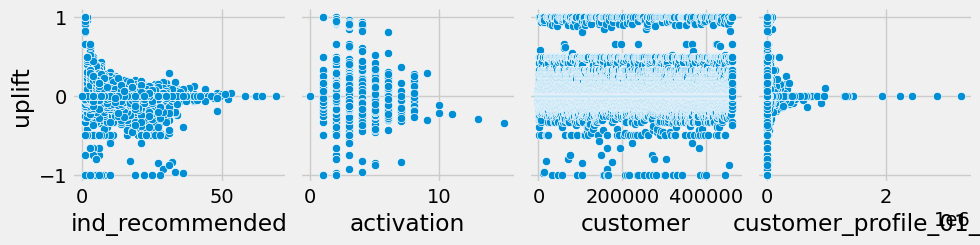

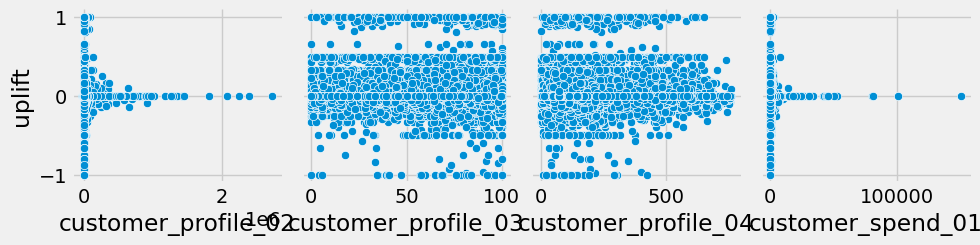

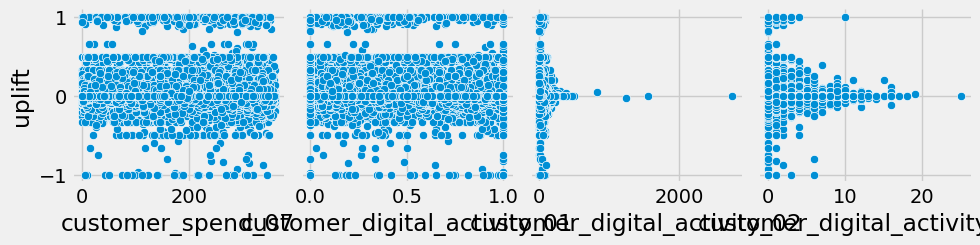

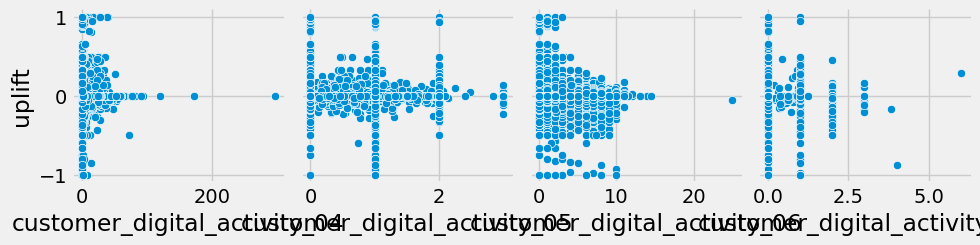

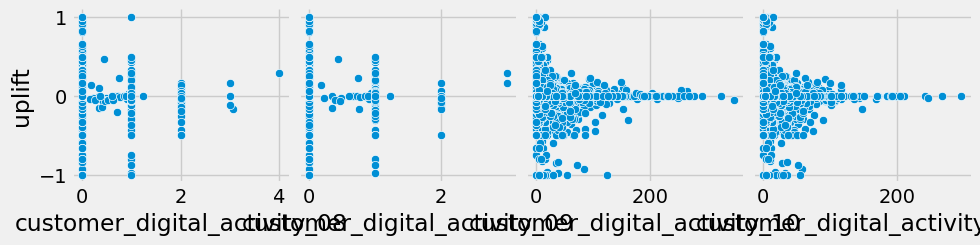

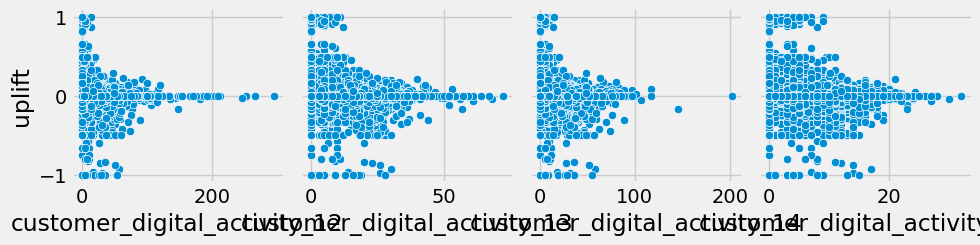

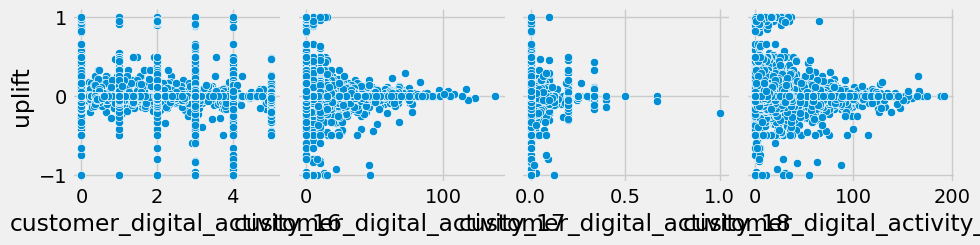

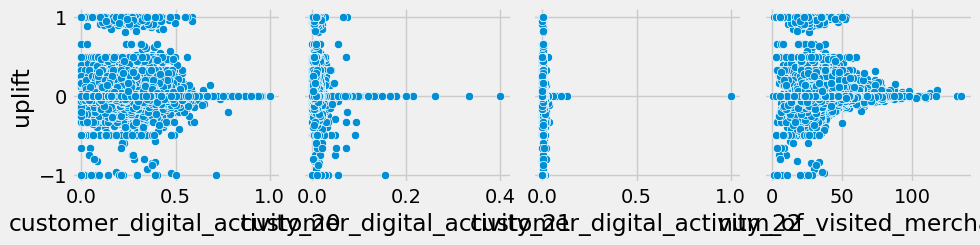

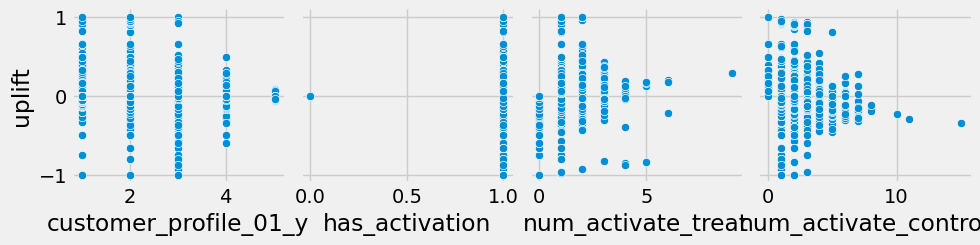

In [50]:
for i in range(0, len(customer_df.columns), 4):
    sns.pairplot(data=customer_df,
                 x_vars=customer_df.columns[i:i+4],
                 y_vars=['uplift'])
plt.show()

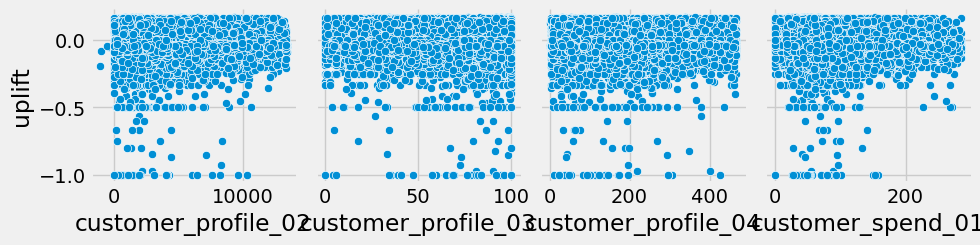

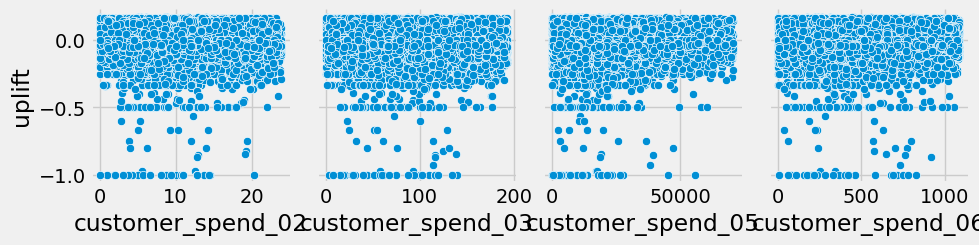

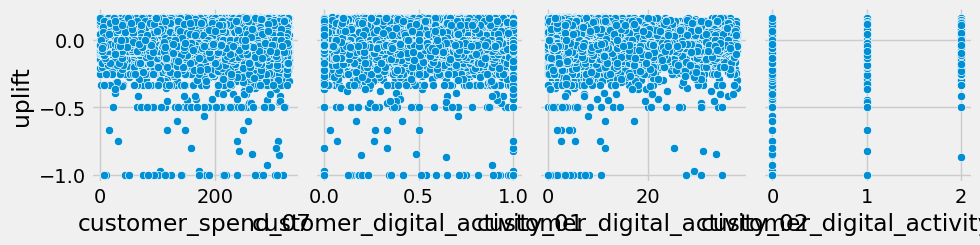

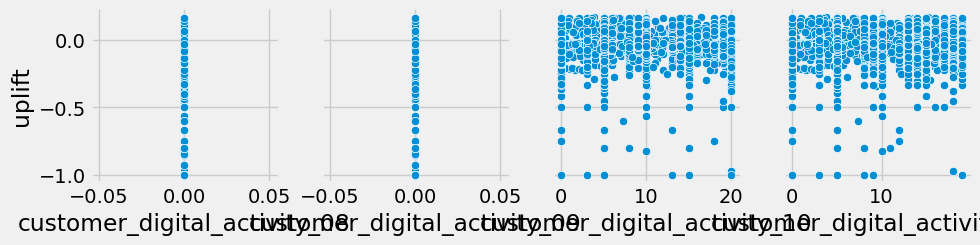

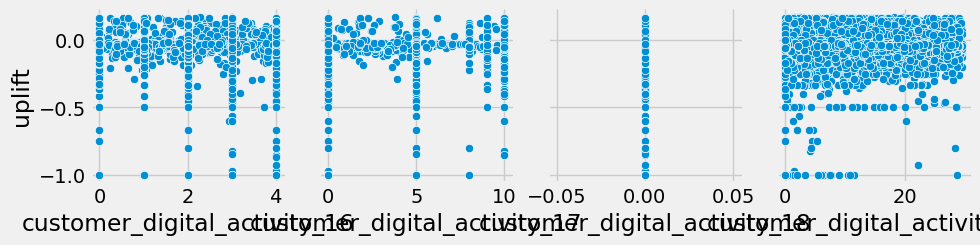

In [64]:
customer_df.apply(filter_outliers)
for i in range(0, len(customer_df.columns), 4):
    sns.pairplot(data=customer_act_df.apply(filter_outliers),
                 x_vars=customer_df.columns[i:i+4],
                 y_vars=['uplift'])
plt.show()

In [65]:
# uplift dist
customer_act_df['uplift'].hist(bins=20)
customer_act_df['uplift'].describe()

count    49893.000000
mean        -0.016818
std          0.126439
min         -1.000000
25%         -0.055556
50%         -0.040000
75%         -0.020833
max          1.000000
Name: uplift, dtype: float64

In [66]:
# uplift dist
customer_act_df['prob_activate_treat'].hist(bins=20)
customer_act_df['prob_activate_treat'].describe()

count    49893.000000
mean         0.034094
std          0.111866
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: prob_activate_treat, dtype: float64

In [67]:
# uplift dist
customer_act_df['prob_activate_control'].hist(bins=20)
customer_act_df['prob_activate_control'].describe()

count    49893.000000
mean         0.053307
std          0.053847
min          0.000000
25%          0.031250
50%          0.043478
75%          0.062500
max          1.000000
Name: prob_activate_control, dtype: float64

User prob of activation is high when they are control than treat. 
this mean that recommandation is not working well. 

In [68]:
customer_act_df.columns

Index(['ind_recommended', 'activation', 'customer', 'customer_profile_01_x',
       'customer_profile_02', 'customer_profile_03', 'customer_profile_04',
       'customer_spend_01', 'customer_spend_02', 'customer_spend_03',
       'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
       'customer_digital_activity_01', 'customer_digital_activity_02',
       'customer_digital_activity_03', 'customer_digital_activity_04',
       'customer_digital_activity_05', 'customer_digital_activity_06',
       'customer_digital_activity_07', 'customer_digital_activity_08',
       'customer_digital_activity_09', 'customer_digital_activity_10',
       'customer_digital_activity_11', 'customer_digital_activity_12',
       'customer_digital_activity_13', 'customer_digital_activity_14',
       'customer_digital_activity_15', 'customer_digital_activity_16',
       'customer_digital_activity_17', 'customer_digital_activity_18',
       'customer_digital_activity_19', 'customer_digital_activity_20

In [109]:
# build a decision tree predicting uplift on customer level 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree



# Create the decision tree classifier object
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split = 100)

col = [#'ind_recommended', 'activation', 'customer', 
       'customer_profile_01_x',
       'customer_profile_02', 'customer_profile_03', 'customer_profile_04',
       'customer_spend_01', 'customer_spend_02', 'customer_spend_03',
       'customer_spend_05', 'customer_spend_06', 'customer_spend_07',
       'customer_digital_activity_01', 'customer_digital_activity_02',
       'customer_digital_activity_03', 'customer_digital_activity_04',
       'customer_digital_activity_05', 'customer_digital_activity_06',
       'customer_digital_activity_07', 'customer_digital_activity_08',
       'customer_digital_activity_09', 'customer_digital_activity_10',
       'customer_digital_activity_11', 'customer_digital_activity_12',
       'customer_digital_activity_13', 'customer_digital_activity_14',
       'customer_digital_activity_15', 'customer_digital_activity_16',
       'customer_digital_activity_17', 'customer_digital_activity_18',
       'customer_digital_activity_19', 'customer_digital_activity_20',
       'customer_digital_activity_21', 'customer_digital_activity_22',
       'num_of_visited_merchant'] 

# Define the conditions for categorizing values
conditions = [
    (customer_act_df['uplift'] > 0),
    (customer_act_df['uplift'] < 0),
    (customer_act_df['uplift'] == 0)
]

# Define the corresponding categories
categories = ['positive', 'negative', 'zero']

# Create a new column 'uplift_category' based on the conditions and categories
customer_act_df['uplift_category'] = np.select(conditions, categories, default='undefined')


X_train = customer_act_df[col]
y_train = customer_act_df['uplift_category']

# Train the tree on your data (X_train, y_train)
clf.fit(X_train, y_train) 


DecisionTreeClassifier(max_depth=3, min_samples_split=100)

In [110]:
customer_act_df[customer_act_df['uplift'] > 0].shape, customer_act_df[customer_act_df['uplift'] < 0].shape, customer_act_df[customer_act_df['uplift'] == 0].shape    

((7718, 44), (39067, 44), (3108, 44))

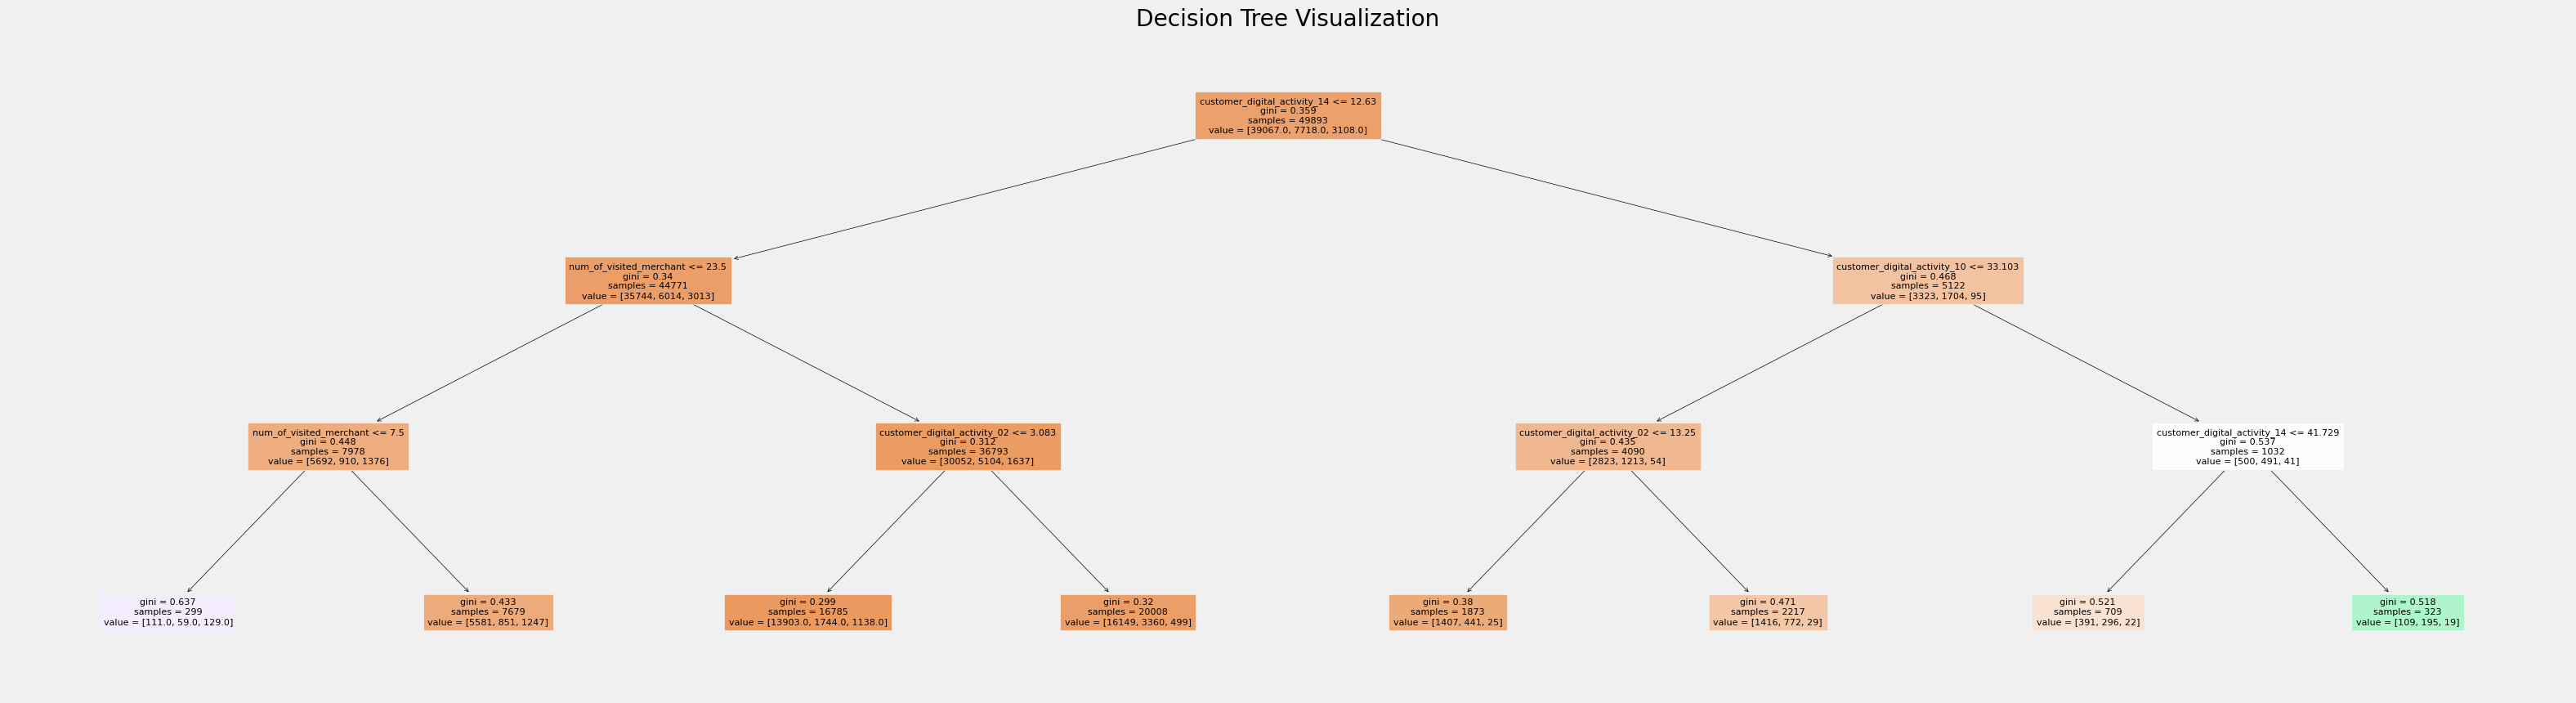

['negative' 'positive' 'zero']


In [114]:
plt.figure(figsize=(36, 10))
plot_tree(clf, filled=True, feature_names= col, fontsize=8 )
plt.title("Decision Tree Visualization")
plt.show()
print(clf.classes_)

In [116]:
# Get feature importances
feature_importances = clf.feature_importances_

# Pair column names with feature importances using zip
feature_importance_pairs = list(zip(col, feature_importances))

# Print feature importance for each feature
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Summarize total importance
total_importance = np.sum(feature_importances)
print("\nTotal Importance:", total_importance)

customer_profile_01_x: 0.0
customer_profile_02: 0.0
customer_profile_03: 0.0
customer_profile_04: 0.0
customer_spend_01: 0.0
customer_spend_02: 0.0
customer_spend_03: 0.0
customer_spend_05: 0.0
customer_spend_06: 0.0
customer_spend_07: 0.0
customer_digital_activity_01: 0.0
customer_digital_activity_02: 0.12016865764916813
customer_digital_activity_03: 0.0
customer_digital_activity_04: 0.0
customer_digital_activity_05: 0.0
customer_digital_activity_06: 0.0
customer_digital_activity_07: 0.0
customer_digital_activity_08: 0.0
customer_digital_activity_09: 0.0
customer_digital_activity_10: 0.08853706398805278
customer_digital_activity_11: 0.0
customer_digital_activity_12: 0.0
customer_digital_activity_13: 0.0
customer_digital_activity_14: 0.44706594278195116
customer_digital_activity_15: 0.0
customer_digital_activity_16: 0.0
customer_digital_activity_17: 0.0
customer_digital_activity_18: 0.0
customer_digital_activity_19: 0.0
customer_digital_activity_20: 0.0
customer_digital_activity_21: 0.